In [1]:
import numpy as np
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.spines.top'] = 0
mpl.rcParams['axes.spines.right'] = 0
mpl.rcParams['axes.spines.left'] = 1
mpl.rcParams['axes.spines.bottom'] = 1
mpl.rcParams.update({'font.size': 12})

(ch:linear-methods-and-linear-regression)=
# Likelihood tests and Linear Regression (Tim Keller)

## Receiver operating characteristic (ROC) curves

Receiver operating characteristic (ROC) curves help use to further understand the competing objects true positive rate (TPR) and false positive rate (FPR). While we want TPR to be as large as possible, FPR on the other hand should be as small as possible. To find the balance between the TPR and FPR we use risk minimization:

$$
    R[\hat{Y}] := \mathbb{E} [\mathrm{loss}(\hat{Y}(X), Y)] = \alpha \mathrm{FPR} - \beta \mathrm{TPR} + \gamma
$$

with the assumption that $\alpha$ and $\beta$ are nonnegative and $\gamma$ is a constant and for all $\alpha, \beta, \gamma$ the risk-minimizing predictor is a likelihood ration test (LRT).

The question we are trying to answer with the help of ROC curves is if we can achieve any combination of FPR and TPR? 

First let us take a look what ROC curves actually are. ROC curves are an intrinsic property of the joint distribution $(X, Y)$ defined as follows: For every $FPR \in [0, 1]$ it shows the best $TPR$ that can be achieved with any predictor with that $FPR$, resulting in a curve that in the $FPR$-$TPR$ plane. The curve shows the maximal $TPR$ for any given $FPR$. Constant predictors that either reject or accept all inputs are always shown on the ROC curve and that is why $(0,0)$ and $(1,1)$ are always on the ROC curve.

```{figure} ./images/roc_curve.png
Example of a generic ROC curve. source: [PPA Chapter 2](https://mlstory.org/)
```

### The Neyman-Pearson Lemma
To show how the ROC curve relates to the likelihood ratio tests we use the Neyman-Pearson Lemma. To show that we want to maximize the true positive rate (TPR) while applying an upper bound on the false positive rate (FPR). That gives us the following optimization problem we want to solve:

$$
    \begin{aligned}
        \text{maximize}  ~  &\mathrm{TPR} \\
        \text{subject to} ~ &\mathrm{FPR} \leq \phi
    \end{aligned}
$$

**Neyman-Pearson Lemma**
: Suppose the likelihood functions $p(x|y)$ are continuous. Then the optimal probabilistic predictor that maximizes $TPR$ with an upper bound on $FPR$ is a deterministic likelihood ratio test.

From the Lemma we can derive that the geometric properties of the ROC curve. It is traced out by the varying threshold in the like likelihood ratio test (LRT) from $-\infty$ to $\infty$.

### some properties of ROC curves
One property we already mentioned is that the points $(0,0)$ and $(1,1)$ are on the ROC curve as the cases where the constant predictor 0 for $(0,0)$ and 1 for $(1,1)$. In the LRT that means that the threshold for the point $(0,0)$ is $\infty$ and for the point $(1,1)$ is $0$.

Another property of the ROC curve is that it must lie above the main diagonal. We can see that for any $\alpha >0$. We can achieve $TPR = FPR = \alpha$ but because of the LRT in the **Neyman-Pearson Lemma** we have $FPR \le \alpha$ and therefore $TPR \ge \alpha$ and never $TPR \le \alpha$.

For any achievable for any achievable $\left(\operatorname{FPR}\left(\eta_1\right), \operatorname{TPR}\left(\eta_1\right)\right)$ and $\left(\operatorname{FPR}\left(\eta_2\right), \operatorname{TPR}\left(\eta_2\right)\right)$, the following is also achievable:

$$
    \left(t \operatorname{FPR}\left(\eta_1\right)+(1-t) \operatorname{FPR}\left(\eta_2\right), t \operatorname{TPR}\left(\eta_1\right)+(1-t) \operatorname{TPR}\left(\eta_2\right)\right)
$$

In conclusion we have another property of the ROC curve: The ROC curve is concave.

### Application to the Snail Example

number of rings: -2.5, P_err = 0.298
number of rings: 0, P_err = 0.15
number of rings: 5, P_err = 0.0
number of rings: 10, P_err = 0.35
number of rings: 12.5, P_err = 0.696


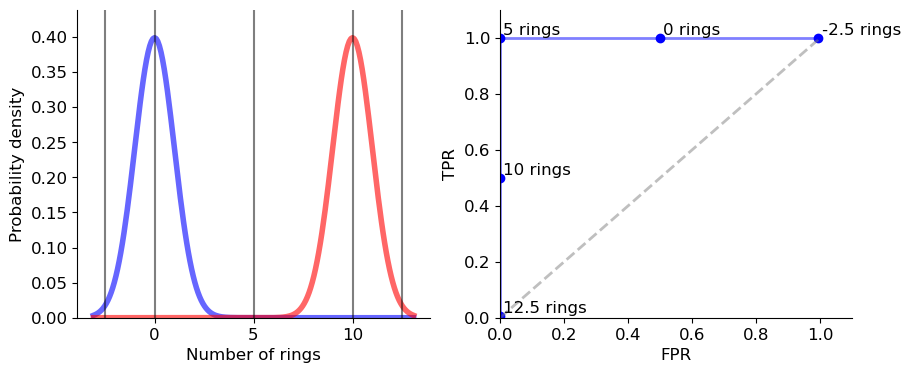

In [2]:
from scipy.stats import norm
import ipywidgets as widgets

sigma = 1
loc1 = 0.0
loc2 = 10
p1 = 0.3
p2 = 1 - p1

x_min = norm.ppf(0.001, loc=min(loc1, loc2), scale=sigma)
x_max = norm.ppf(0.999, loc=max(loc1, loc2), scale=sigma)
x = np.linspace(x_min, x_max, 200)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
ax = axs[0]
line1, = ax.plot(x, norm.pdf(x, loc=loc1, scale=sigma),
       'b-', lw=4, alpha=0.6, label='skewnorm pdf')
line2, = ax.plot(x, norm.pdf(x, loc=loc2, scale=sigma),
       'r-', lw=4, alpha=0.6, label='skewnorm pdf')

ax.set_xlabel('Number of rings')
ax.set_ylabel('Probability density')
y_max = 1.1 / sigma / np.sqrt(2 * np.pi)
ax.set_ylim(0, y_max)
axs[1].set_xlim(0, 1.1)
axs[1].set_ylim(0, 1.1)
axs[1].set_xlabel("FPR")
axs[1].set_ylabel("TPR")
axs[1].plot([0, 1], [0, 1], '--', linewidth=2, alpha=0.5, color='grey')

tprs = []
fprs = []

def update(thr):
    FPR = 1 - norm.cdf(thr, loc=loc1, scale=sigma)
    FNR = norm.cdf(thr, loc=loc2, scale=sigma)
    TPR = 1 - FNR    
    tprs.append(TPR)
    fprs.append(FPR)

    p_mistake = p1*FPR + p2*FNR
    ax.plot([thr, thr], [0, y_max], 'k', alpha=0.5)
    print('number of rings: {}, P_err = {}'.format(thr,round(p_mistake, 3)))
    axs[1].scatter(FPR, TPR, color='b')
    axs[1].annotate('{} rings'.format(thr),(FPR+0.01, TPR+0.01))
    fig.canvas.draw_idle()

for thr in  [-2.5, 0, 5, 10, 12.5]:
    update(thr)

axs[1].plot(fprs, tprs, 'b', linewidth=2, alpha=0.5)
plt.show()

We calculate the possible pairs of $FPR$ and $TPR$ for determining the sex of snails by the different number of rings they have. The curve does not have a perfect shape but we are able to observe all the different characteristics of the ROC curve. The points $(0,0)$ and $(1,1)$ are on the curve, the curve is concave and the curve lies above the main diagonal.

## Maximum a posteriori and maximum likelihood
Something that is often said in statistical decision theory and that we also already noticed in the things that we have done: essentially all optimal rules are equivalent to likelihood ratio tests (LRTs). This isn't 100% true but it is true in most of the cases and mainly in the many very important prediction rules. The same thing is true for the maximum a posteriori (MAP) rule and the maximum likelihood (ML) rule that we want to take a look at now. 
We define the expected error of a predictor $\hat{Y}$ as the expected number of mistakes in classification. For example, if we predict $\hat{Y} = 1$ when $Y = 0$ is the actually true. The error is defined by the risk with the following cost: 

| loss | $\hat{Y}$ = 0 | $\hat{Y}$ = 1|
|-----|--------:|--------:|
| $Y$ = 0 | 0   |  1  |
| $Y$ = 1 | 1 | 0  |

Minimizing the risk with the defined cost is equivalent to minimizing the expected error and are also given by the likelihood rats tests. In this case we have: 

$$
    \frac{p_0(\operatorname{loss}(1,0)-\operatorname{loss}(0,0))}{p_1(\operatorname{loss}(0,1)-\operatorname{loss}(1,1))} = \frac{p_0}{p_1} \cdot \frac{1 - 0}{1 - 0} = \frac{p_0}{p_1}
$$
This results in the maximum a posteriori (MAP) rule: 

$$
    \begin{aligned}
    \hat{Y}(x) 
    &= \mathbb{1} \left\{ \mathcal{L}(x) \geq \frac{p_0}{p_1} \right\} \\
    &= \mathbb{1} \left\{  \frac{p(x \mid y = 1)}{p(x \mid y = 0)} \geq \frac{p_0}{p_1} \right\} \\
    &= \mathbb{1} \bigg\{  p_1 p(x \mid y = 1) \geq p_0 p(x \mid y = 0) \bigg\} \\
    &= \mathbb{1} \bigg\{  \mathbb{P}[Y = 1 \mid X = x] \geq \mathbb{P}[Y = 0 \mid X = x] \bigg\} \\
    &= \arg\max_{y \in \{ 0, 1\}} \mathbb{P}[Y = y \mid X = x]
    \end{aligned}
$$

The name comes from the expression $\mathbb{P}[Y = y \mid X = x]$ which called the posterior probability of $Y$ given $X$.

Equivalent to the MAP rule is the maximum likelihood (ML) rule when $p_0 = p_1$. The only difference is that we  use the likelihood of the point $x$ given $Y = y$ defined as $p(x | Y = y)$ instead of the posterior probability. The ML rule is defined as:

$$
    \hat{Y}_\text{ML}(x) = \arg\max_y p(x | Y = y)
$$

Like MAP the ML is also a likelihood ratio test, which is not a coincidence because Likelihood ratio tests are in most castes the optimal solution for optimization-driven decision problems.

## Towards Supervised Learning
Our previous approach to constructing optimal (risk-minimizing) prediction was to predict an unkonwn outcome Y by using the information available in form of a random variable X. For binary outcomes we were able to construct rules for optimal predictors $\hat{Y}$ of the form. 

$$
    \hat{Y}(x) = \mathbb{1}(\mathcal{L}(x) \geq \eta)
$$

These predictions rules often turned out to be some form of a Likehood Ratio Test (LRT) or in other words the ratio of two likelihood functions.
Unfortunately this type of predictor has limitations in practice because we rarely know the likelihoods or joint distributions to compute $\mathcal{L}(x)$ and do not have access to the entire population we interact with.
To be able to fully solve the problems we for example need probability density functions (pdf) for the positive and negative instances of the outcome. In a lot of cases we are not able to get these pdfs easily.
What we can take away from the likelihoods are how they characterize the pair of random variables $(X,Y)$ and how which model a population of instances/patterns.
We now take the next step towards and more algorithmical approach and have try to answer the following questions:

1. What knowledge can we assume to have?
2. How do we build algorithms given the knowledge we have?

## Sample vs. population

To get our answers we start with the assumption that we have n "labeled" instaces $(x_1,y_1),\dots,(x_n,y_n)$ where each $(x_i,y_i)$ is drawn from the underlying distribution $(X,Y)$ (Sometimes in this context also the word realization is used). Both *draw* and *realization* are not 100% precise descriptions but they are good enough to conveniently explain the process that is happening. When doing math and statistics of learning like that , we often assume that the instances are drawn independently and identically distributed (i.i.d.) from the distribution $(X,Y)$. This means that the instances are drawn from the same distribution and that the instances are independent of each other and their features. 

## Linear Regression
We have independent and identically distributed (i.i.d.) data samples and want to see how the samples are related to each other and can be correctly classified. How do we use linear regression to help us do this?

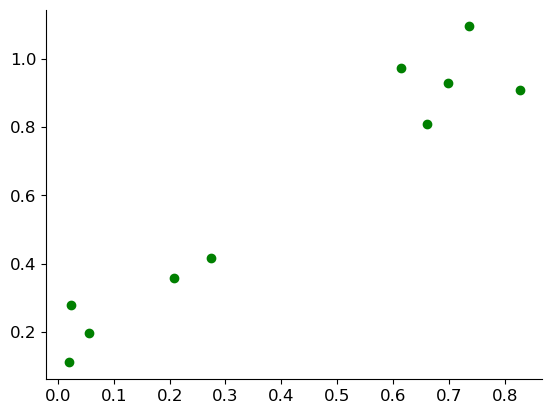

In [3]:
from sklearn.linear_model import LinearRegression

n = 10
a = 1.0
b = 0.2
sig = 0.08
deg = n - 1

x = np.random.rand(n, 1)
x = np.sort(x, axis=0)
y = a*x + b + sig*np.random.randn(n, 1)

fig, ax = plt.subplots(1, 1)
ax.scatter(x, y, color='g')

reg = LinearRegression().fit(x, y)
p = np.poly1d(np.polyfit(x.flatten(), y.flatten(), deg))

x_grid = np.linspace(0, 1, 200).reshape(-1, 1)

line, = ax.plot([],[], 'k')

First we assume a linear model defined like this: 

$$
\hat{Y}(x) = \hat{y} = w_0 + w_1 \cdot x
$$

Now we have to choose the weights $w_0$ and $w_1$ such that the model fits the data well and minimize the error. Essentially we are try to find the straight line (in two dimensions, in three dimensions it is a plane like we will see later) that represents our sampled data the best. Usually in linear regression we measure the error of a sample using quadratic error:

$$
    \mathrm{loss}(\hat{y}, y) = (\hat{y} - y)^2
$$

In earlier chapters we calculated the error with expected values like $\min_{w_0, w_1} \mathbb{E} ~ \mathrm{loss}(\hat{Y}(X), Y) = \min_{w_0, w_1} \mathbb{E} ~ (w_0 + w_1 X - Y)^2$. That is not possible for the applied way we do it in realistic supervised learning problems. We have to use the sample data to estimate the error. Instead we attempt to solve for the minimal quadratic error: 

$$
    \min_{w_0, w_1} \frac{1}{n} \sum_{i = 1}^n (w_0 + w_1 x_i - y_i)^2
$$

Here you can see our first attempt at finding the linear regression line to represent our sample:

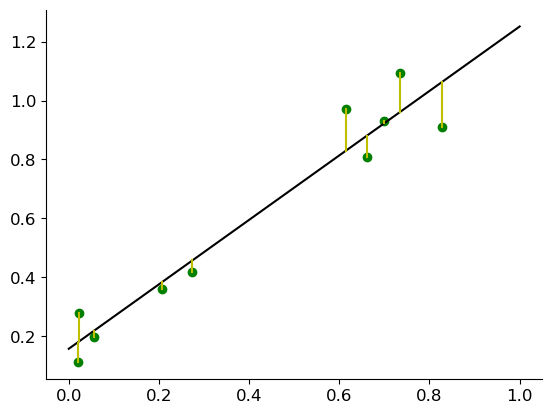

In [4]:
fig, ax = plt.subplots(1, 1)
ax.scatter(x, y, color='g')

reg = LinearRegression().fit(x, y)
y_hat = reg.predict(x)

x_grid = np.linspace(0, 1, 200).reshape(-1, 1)
line, = ax.plot(x_grid, reg.predict(x_grid), 'k')
for i in range(n):
    plt.plot([x[i], x[i]], [y[i], y_hat[i]], 'y')


So now how do we  find $w_0$ and $w_1$? 

First we take the derivate of the formula we have and set it to zero afterwards (we added $\frac{1}{2}$ to make the calculation easier but it does not change the optimal $w_0$ and $w_1$): 

$$
    \begin{aligned}
        \frac{\partial}{\partial w_0} \left\{ \frac{1}{2n} \sum_{i = 1}^n (w_0 + w_1 x_i - y_i)^2 \right\} \\
        = \frac{1}{n} \sum_{i = 1}^n (w_0 + w_1 x_i - y_i) \\
        = w_0 + w_1 \frac{1}{n} \sum_{i=1}^n x_i - \frac{1}{n} \sum_{i=1}^n y_i \\
        =: w_0 + w_1 \overline{x} - \overline{y}
    \end{aligned}
$$

$$
    \begin{aligned}
        \frac{\partial}{\partial w_1} \left\{ \frac{1}{2n} \sum_{i = 1}^n (w_0 + w_1 x_i - y_i)^2 \right\} \\
        = \frac{1}{n} \sum_{i = 1}^n (w_0 + w_1 x_i - y_i) x_i \\
        = w_0 \frac{1}{n} \sum_{i=1}^n x_i + w_1 \frac{1}{n} \sum_{i=1}^n x_i^2 - \frac{1}{n} \sum_{i=1}^n y_i x_i \\
        =: w_0 \overline x + w_1 \overline {x^2} - \overline{x y}
    \end{aligned}
$$
Where $\overline{x} = \frac{1}{n} \sum_{i=1}^n x_i$ is the sample mean of $x$ (applicable in the same way to $\overline{y}, \overline{x^2}, \overline{xy}$ and others).

Now we set the partial derivatives to zero and solve for $w_0$ and $w_1$:
$\newcommand{\emp}{\hat{\mathbb{E}}}$

$$
    \bar{x} \bar{y} - w_1 \bar{x}^2 + w_1 \bar{x^2} - \overline{xy} = 0
$$

$$
    w_1 (\bar{x^2} - \bar{x}^2) = \bar{xy} - \bar{x}\bar{y}
$$

$$
    w_1 = \frac{\emp[xy] - \emp[x]\emp[y]}{\emp[x^2] - \emp[x]^2} \quad \quad w_0 = \emp[y] - w_1 \emp[x]
$$

By solving for $w_0$ and $w_1$ we found the optimal weights that represent our sample data. We put in a lot of effort to get this result but to be honest this is not really generally applicable. We want to focus on a more general solution for the best weights with minimal error that we can use for all kindas of vectors and matrices. To be able to do that we have to take the original formula for the weights and put it in a different notation:

$$
(w_0 + w_1 x - y)^2 = \left([1 \quad x] \begin{bmatrix}w_0 \\ w_1\end{bmatrix} - y\right)^2
$$

$$
\arg \min_{w_0, w_1} \frac{1}{2}
\left\|
\left[\begin{array}{c}
y_1 \\
\vdots \\
y_n
\end{array}\right]
-
\left[\begin{array}{cc}
1 & x_1 \\
\vdots & \vdots \\
1 & x_n
\end{array}\right] 
\left[\begin{array}{l}
w_0 \\
w_1
\end{array}\right]
\right\|_2^2
$$

where we denote the vectors as follows: 

$$
\mathbf{y} = \left[\begin{array}{c}
y_1 \\
\vdots \\
y_n
\end{array}\right]
\quad
\mathbf{X} = 
\left[\begin{array}{cc}
1 & x_1 \\
\vdots & \vdots \\
1 & x_n
\end{array}\right]
\quad
\mathbf{w} = \left[\begin{array}{l}
w_0 \\
w_1
\end{array}\right]
$$

Putting everything together we have have the following loss function:

$$
\arg \min_{\mathbf{w} \in \mathbb{R}^2} \frac{1}{2} \| \mathbf{y} - \mathbf{X} \mathbf{w} \|^2
$$

## Linear Regression and Least Squares

What we previously had as the more general notation can also be derived from the residual sum of squares (RSS) of a linear regression model. The RSS is also called the sum of squared errors (SSE), which relates back to the quadratic/squared error we earlier introduced for linear regression. The RSS is defined as:

$$
  RSS(w) =  \sum_{i = 1}^n (y_i - (w_0 + w_1 \cdot x_i))^2 
$$

$$
  = \sum_{i = 1}^n \left(y_i - [1 \quad x_i] \begin{bmatrix}w_0 \\ w_1\end{bmatrix}\right)^2 
$$

$$
  = \left\|
    ~
    \begin{bmatrix}
    y_1 \\ y_2 \\ \vdots \\ y_n
    \end{bmatrix}
    -
    \begin{bmatrix}
    1 & x_1 \\
    1 & x_2 \\
    \vdots & \vdots \\
    1 & x_n
    \end{bmatrix}
    \begin{bmatrix}
    w_0 \\ w_1
    \end{bmatrix}
    ~
    \right\|^2
    &=&
    \| \mathbf{y} - \mathbf{X} \mathbf{w} \|^2
$$

The method that minimizes the RSS is called least squares. Least squares uses maximum likelihood estimation (MLE) to find minimal sum of squared distances from each point in our sample data to its approximation. In the end the goal is once again to find the best weights that minimize the loss: 


$$
    \mathbf{w}^\star = \arg\min_{\mathbf{w}} \underbrace{\| \mathbf{y} - \mathbf{X} \mathbf{w} \|^2}_{= \text{loss} ~ \mathcal{L}(\mathbf{w})}
$$

Mathematically it is once again the same procedure to find the optimal solution by computing the partial derivatives with respect to the components of $\mathbf{w} = [w_0, w_1, \ldots, w_d]$:

$$
\nabla_\mathbf{w} \left( \| \mathbf{y} - \mathbf{X} \mathbf{w} \|^2 \right)
=
\frac{\partial \mathcal{L}(\mathbf{w})}{\partial \mathbf{w}}
=
\begin{bmatrix}
    \frac{\partial \mathcal{L}}{\partial w_0} \\
    \frac{\partial \mathcal{L}}{\partial w_1} \\
    \vdots \\
    \frac{\partial \mathcal{L}}{\partial w_d} \\
\end{bmatrix}
= 
-2 \mathbf{X}^T(\mathbf{y} - \mathbf{X} \mathbf{w})
$$

In the end we get the optimal weights for the linear regression applicable to vectors and matrices, which is also known as the ordinary least squares (OLS) solution:

$$
-2 \mathbf{X}^T(\mathbf{y} - \mathbf{X} \mathbf{w}) = \mathbf{0}
\Rightarrow
\mathbf{w}^\star = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

where $X^TX$ is the sum of squares matrix: 
$$
X^TX = \sum_{i=1}^n x_i x_i^T
$$

## Higher Dimension

In the "real world" pattern recognition often are not as easily describable as a simple straight line or other simple scalar patterns and features. For example in the digit classification example we had vector features $\mathbf{x} \in \mathbb{R}^{784}$ or $\mathbf{x} \in \mathbb{R}^{28 \times 28}$. So we have more than enough reasons to generalize the linear regression model to a higher dimension:

$$
    \hat{y} = w_0 + \sum_{i = 1}^d w_i x_i
    =
    [1, x_1, \ldots, x_d]
    \begin{bmatrix}
        w_0 \\ w_1 \\ \vdots \\ w_d
    \end{bmatrix}
    =: \mathbf{x}^T \mathbf{w}
$$

For a training set $(\mathbf{x}_1, y_1), \ldots, (\mathbf{x}_n, y_n)$ we can write the vectors as before:

$$
    \mathbf{y} =
    \begin{bmatrix}
        y_1 \\ y_2 \\ \vdots \\ y_n
    \end{bmatrix}
    \quad \quad
    \mathbf{X} =
    \begin{bmatrix}
        1 & - \ \mathbf{x}_1^T \  - \\
        \vdots &  \ \vdots \   \\
        1 & - \ \mathbf{x}_n^T \ -
    \end{bmatrix}
    \quad \quad
    \mathbf{w} =
    \begin{bmatrix}
    w_0 \\ w_1 \\ \vdots \\ w_d
    \end{bmatrix}
$$

Once again we get the same loss function that has different dimensions but is generally applicable:

$$
\arg \min_{\mathbf{w} \in \mathbb{R}^{d+1}} \frac{1}{2} \| \mathbf{y} - \mathbf{X} \mathbf{w} \|^2
$$

To get some more context and a better idea of how the linear regresssion looks like in a higher dimensions let's look at another example like the one we had before but with three dimensions:

MAE: 311.14771680551314
RMSE: 377.0563820609984
Equation: y = -1187.21 + 59.92x1 + 60.04x2


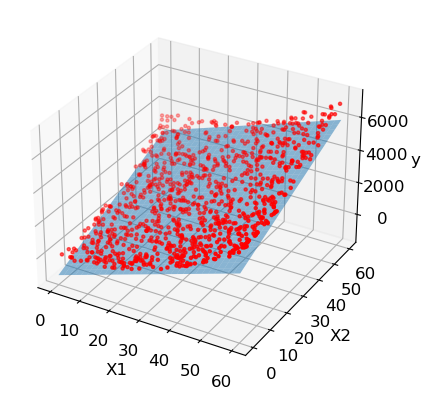

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model

from mpl_toolkits.mplot3d import Axes3D

X_train = np.random.rand(2000).reshape(1000,2)*60
y_train = (X_train[:, 0]**2)+(X_train[:, 1]**2)
X_test = np.random.rand(200).reshape(100,2)*60
y_test = (X_test[:, 0]**2)+(X_test[:, 1]**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='.', color='red')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")

model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE: {}".format(np.abs(y_test-y_pred).mean()))
print("RMSE: {}".format(np.sqrt(((y_test-y_pred)**2).mean())))

coefs = model.coef_
intercept = model.intercept_
xs = np.tile(np.arange(61), (61,1))
ys = np.tile(np.arange(61), (61,1)).T
zs = xs*coefs[0]+ys*coefs[1]+intercept
print("Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(intercept, coefs[0],
                                                          coefs[1]))

ax.plot_surface(xs,ys,zs, alpha=0.5)
plt.show()